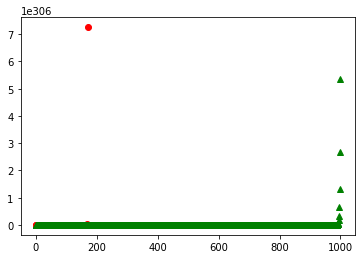

In [24]:
import matplotlib.pyplot as plt
import scipy.special
import math

%matplotlib inline

x = [];
y = [];
z=[];
for i in range(0,1000 ):
    x.append(i);
    y.append(scipy.special.factorial(i));
    z.append(math.pow(2, i) * math.pow(i,2));


plt.plot(x,y,'ro');
plt.plot(x,z, 'g^');


In [14]:
# 1,2,3,4
# Create dist vectors from --> to 
dist = {};
COST = {};
pred= {};

dist[1] = [0,12,14,17]
dist[2] = [12,0,15,18]
dist[3] = [14,15,0,29]
dist[4] = [17,18,2,0]


pred[1] = [1,1000,1000,1000];
pred[2] = [1,1000,1000,1000];
pred[3] = [1,1000,1000,1000];
pred[4] = [1,1000,1000,1000];

#---------------------------------------
# Recurrence
#COST(S,j) = min ( COST( (S-i),j) + dij)
#----------------------------------------

# EMPTY SET S 
COST["KEY_SUBSET_._1"] = 10000000; # infinite 
COST["KEY_SUBSET_._2"] = dist[1][1];
COST["KEY_SUBSET_._3"] = dist[1][2];
COST["KEY_SUBSET_._4"] = dist[1][3];



# NOW START LOOP OVER A SUPER LIST 
SL = [2,3,4]

# subsets of list  of given length
def ret_subsets(a_list, a_length) :
    
    if (len(a_list) == a_length) :
        return [a_list];
    mlist = [];
    if (a_length ==0):
        return mlist;
    for i in range (0 , len(a_list)):
        tlist = [];
        for j in range (0 , a_length):
            index = i+j;
            index = index % len(a_list);
            tlist.append(a_list[index])
        mlist.append(tlist)
    return mlist



def ret_minus(tlist, elm):
    rlist = [];
    #print("TLIST in minus %s"%(tlist));
    for k in tlist:
        if (k != elm):
            rlist.append(k);
    return rlist;




def make_key(slist, dest):
    #COST["KEY_SUBSET_._1"] = 10000000; # infinite 
    key = "KEY_SUBSET_";
    if (len(slist) == 0):
        key = key + ".";
    else :
        for k in slist:
          key = key + "%d."%(k);
    key = key + "_%d"%(dest);
    return key;



def populate_min(mlist, size, dest):
    global COST 
    global dist
    min = 1000;
    #print("SIZE %d DEST %d"%(size, dest));
    subr = ret_subsets(mlist,size) ; # GET ALL SUBSETS OF SIZE S
    for s in subr:
        s = ret_minus(s,dest);
        masterkey = make_key(s,dest);
        subkeys = [];
        
        
        for elm in s:
            remset  = ret_minus(s,elm);
            c =  COST[make_key(remset,elm)]
            ds = dist[elm][dest-1]
            cal = c + ds;
            #print("COST %s is %d and dist %d to %d is %d final %d min %d"%(make_key(remset,elm),c , elm, dest, ds, cal, min ));
            if (cal < min) :
                
                min = cal;
                #print("Updating min to %d"%(min))
                pred[dest][size] = elm;
                
                
        if (len(s) != 0) :
            COST[masterkey] = min;
        
    #print ("PREDECESSOR MIN is %d"%(pred[dest][size]))
            


#print (ret_subsets(SL,3));
sub_list = []
for i in range (1,len(SL)+1):
    for k in  SL:
                populate_min(SL,i,k); # store final data here 
                

min = 1000;
fr = 1000;
for k in SL:
    tlist = ret_minus(SL,k);
    xkey = make_key(tlist,k);
    cost = COST[xkey] + dist[k][0];
    if (cost < min):
        min = cost;
        fr = xkey;
    

print("Minimum cost is %d from %s"%(min, fr))   
print(pred)
#print(COST)

Minimum cost is 46 from KEY_SUBSET_3.4._2
{1: [1, 1000, 1000, 1000], 2: [1, 3, 3, 3], 3: [1, 4, 4, 4], 4: [1, 2, 2, 2]}
